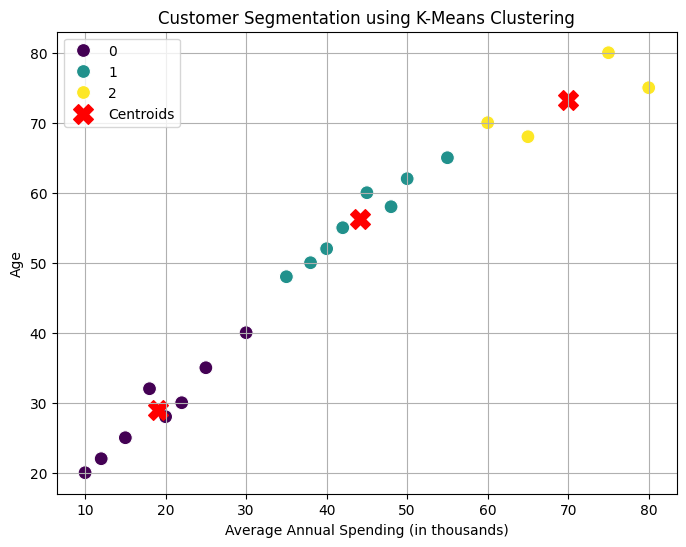


Cluster Assignments:
    CustomerID  Cluster
0            1        0
1            2        0
2            3        1
3            4        1
4            5        2
5            6        2
6            7        0
7            8        0
8            9        1
9           10        1
10          11        0
11          12        0
12          13        1
13          14        1
14          15        2
15          16        2
16          17        0
17          18        0
18          19        1
19          20        1

Cluster Centers:
[[19.    29.   ]
 [44.125 56.25 ]
 [70.    73.25 ]]


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Spending': [15, 18, 35, 42, 60, 65, 12, 20, 38, 45, 25, 30, 50, 55, 75, 80, 10, 22, 40, 48],
    'Age': [25, 32, 48, 55, 70, 68, 22, 28, 50, 60, 35, 40, 62, 65, 80, 75, 20, 30, 52, 58]
}
df = pd.DataFrame(data)

# Select the features for clustering (Spending and Age)
X = df[['Spending', 'Age']]

# Choose the number of clusters (let's start with 3)
n_clusters = 3

# Initialize the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init for better convergence

# Fit the model to the data and predict the cluster assignments
df['Cluster'] = kmeans.fit_predict(X)

# Get the cluster centers
centers = kmeans.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Spending', y='Age', hue='Cluster', data=df, palette='viridis', s=100)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Average Annual Spending (in thousands)')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

# Print the cluster assignments
print("\nCluster Assignments:")
print(df[['CustomerID', 'Cluster']])

# Print the cluster centers
print("\nCluster Centers:")
print(centers)

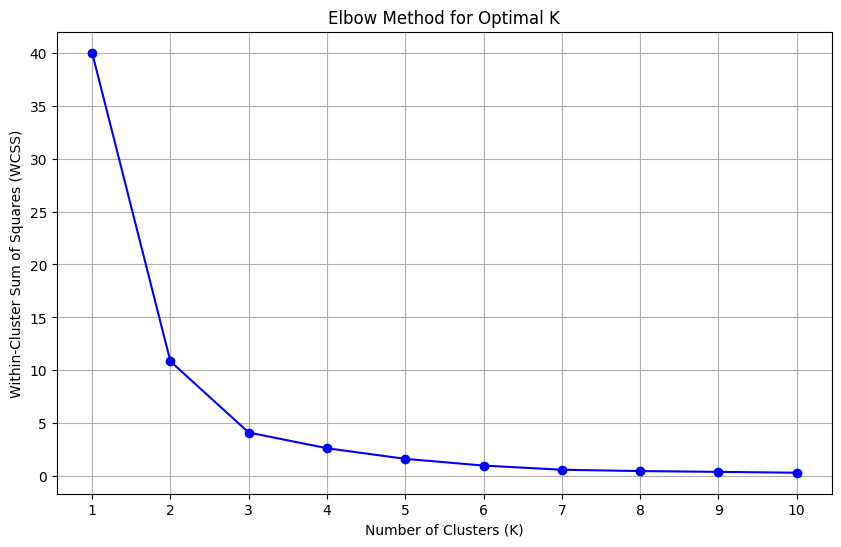

WCSS values for different k:
K=1: WCSS=40.00
K=2: WCSS=10.85
K=3: WCSS=4.13
K=4: WCSS=2.65
K=5: WCSS=1.64
K=6: WCSS=1.01
K=7: WCSS=0.61
K=8: WCSS=0.49
K=9: WCSS=0.41
K=10: WCSS=0.33


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have your customer data loaded in a pandas DataFrame called 'df'
# and the features you want to use for clustering are in columns 'Feature1', 'Feature2', etc.
# For this example, let's use the 'Spending' and 'Age' columns from the previous example.
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Spending': [15, 18, 35, 42, 60, 65, 12, 20, 38, 45, 25, 30, 50, 55, 75, 80, 10, 22, 40, 48],
    'Age': [25, 32, 48, 55, 70, 68, 22, 28, 50, 60, 35, 40, 62, 65, 80, 75, 20, 30, 52, 58]
}
df = pd.DataFrame(data)
X = df[['Spending', 'Age']]

# Scale the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Range of k values to test
k_values = range(1, 11)  # You can adjust this range

# List to store the within-cluster sum of squares (WCSS) for each k
wcss = []

# Iterate through different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center.

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Print the WCSS values for each k (optional)
print("WCSS values for different k:")
for k, w in zip(k_values, wcss):
    print(f"K={k}: WCSS={w:.2f}")